<a href="https://colab.research.google.com/github/Zblu2/movies-data-analysis-python/blob/main/Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


In [3]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('movies.csv')

Saving movies.csv to movies.csv


In [4]:
# Data overview

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
# check if there is missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [6]:
# As there is missing data in the categories I am interested in, I have opted to drop these datapoints and then check that there is no missing values

df.dropna(inplace=True)
print(df.isnull().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [7]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


<Axes: >

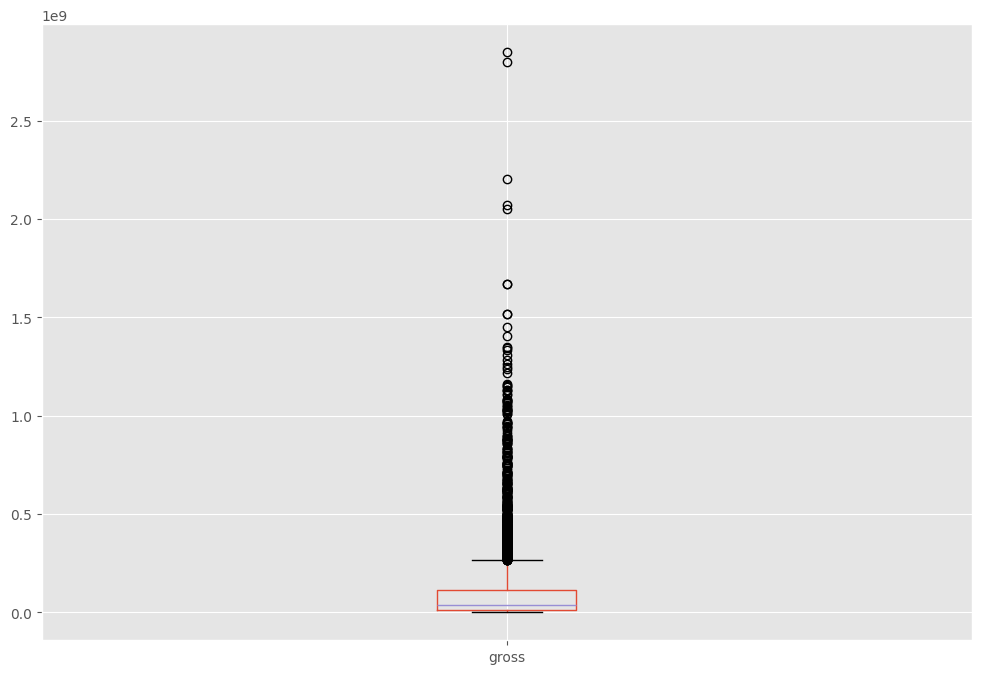

In [8]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [9]:
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0


In [10]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0


<Axes: xlabel='gross', ylabel='budget'>

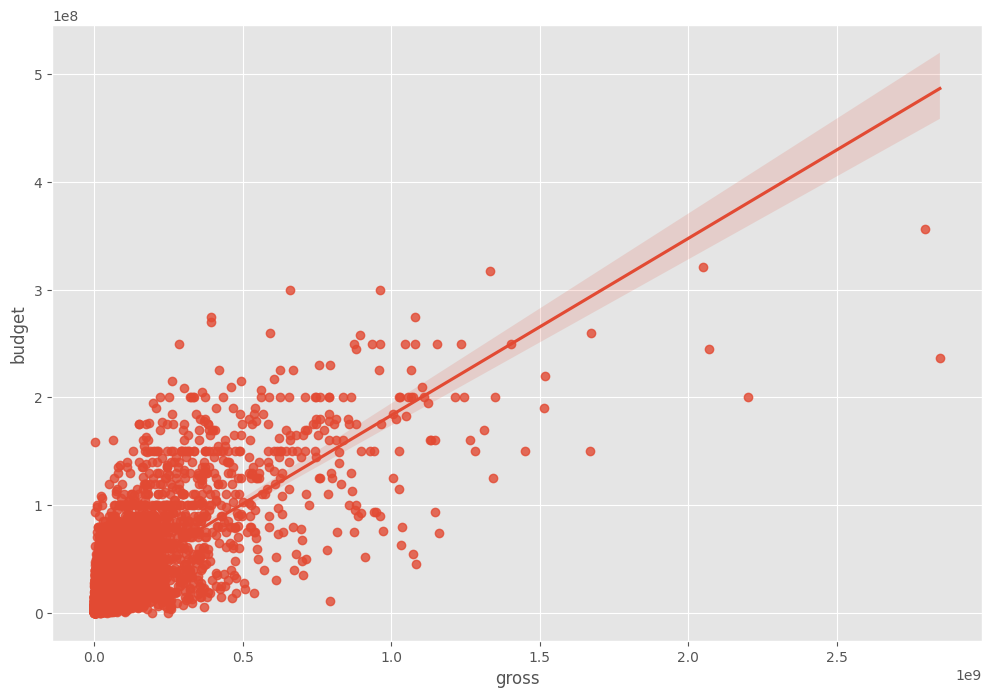

In [11]:
sns.regplot(x="gross", y="budget", data=df)

<Axes: xlabel='score', ylabel='gross'>

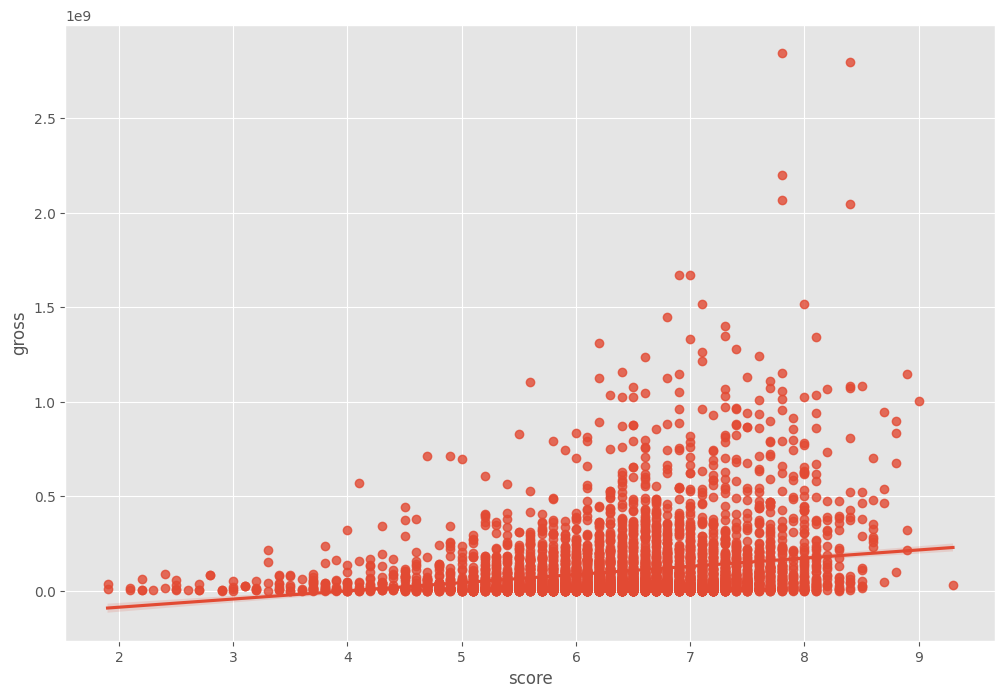

In [12]:
sns.regplot(x="score", y="gross", data=df)

In [13]:
# Correlation Matrix between all numeric columns

df.select_dtypes(include='number').corr(method='kendall')


,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


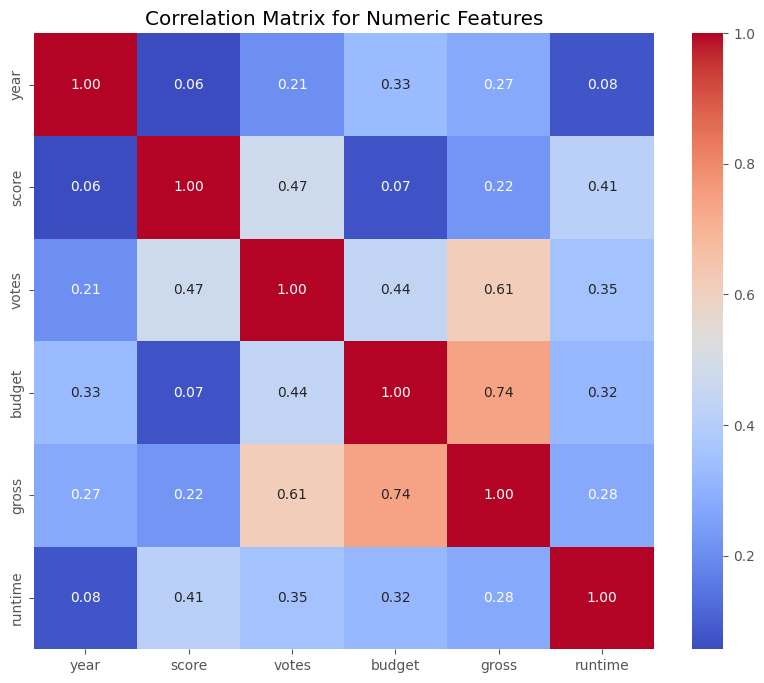

In [14]:
# Compute correlation on numeric-only data
correlation_matrix = df.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numeric Features")
plt.show()

In [25]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

corr_pairs = corr_pairs.drop_duplicates()

print(corr_pairs)

name     rating      0.169808
         genre       0.028413
         year        0.965461
         released    0.966086
         score      -0.020083
                       ...   
budget   company    -0.053573
         runtime     0.134894
gross    company     0.545924
         runtime     0.047728
company  runtime    -0.010695
Length: 105, dtype: float64


In [40]:
# Filter pairs involving 'gross'
gross_pairs = corr_pairs[
    (corr_pairs.index.get_level_values(0) == 'gross') |
    (corr_pairs.index.get_level_values(1) == 'gross')
]

# Sort by absolute correlation strength
gross_pairs = gross_pairs.sort_values(key=abs, ascending=False)

print("Correlation pairs including 'gross':\n")
print(gross_pairs)

Correlation pairs including 'gross':

released  gross      0.998490
year      gross      0.996371
name      gross      0.967925
writer    gross      0.811356
director  gross      0.751737
star      gross      0.720811
gross     company    0.545924
votes     gross      0.307248
budget    gross      0.305284
rating    gross      0.172703
country   gross      0.094820
gross     runtime    0.047728
genre     gross      0.032033
score     gross     -0.015744
dtype: float64


In [41]:
strong_pairs = gross_pairs[abs(gross_pairs) > 0.2]

print(strong_pairs)

released  gross      0.998490
year      gross      0.996371
name      gross      0.967925
writer    gross      0.811356
director  gross      0.751737
star      gross      0.720811
gross     company    0.545924
votes     gross      0.307248
budget    gross      0.305284
dtype: float64


In [44]:
exclude_var = 'name'
# Exclude any pair where either variable is 'name'
gross_pairs_filtered = gross_pairs[
    (gross_pairs.index.get_level_values(0) != exclude_var) &
    (gross_pairs.index.get_level_values(1) != exclude_var)
]

# Sort by absolute correlation strength
gross_pairs_filtered = gross_pairs_filtered.sort_values(key=abs, ascending=False)

print("Correlation pairs with 'gross' excluding 'name':\n")
print(gross_pairs_filtered)


Correlation pairs with 'gross' excluding 'name':

released  gross      0.998490
year      gross      0.996371
writer    gross      0.811356
director  gross      0.751737
star      gross      0.720811
gross     company    0.545924
votes     gross      0.307248
budget    gross      0.305284
rating    gross      0.172703
country   gross      0.094820
gross     runtime    0.047728
genre     gross      0.032033
score     gross     -0.015744
dtype: float64


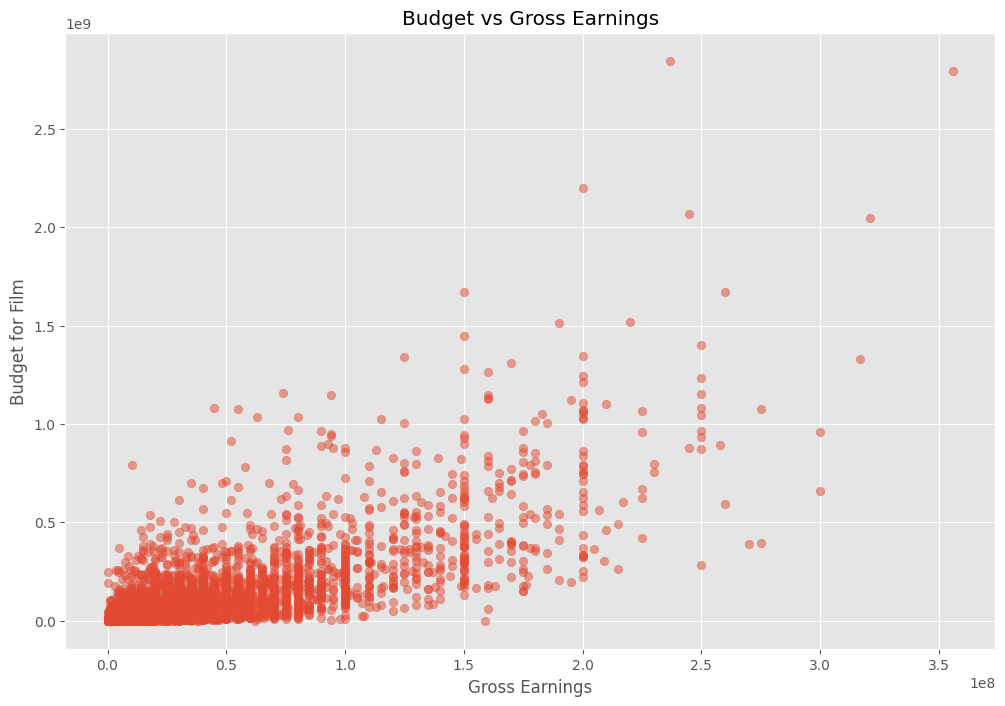

In [45]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

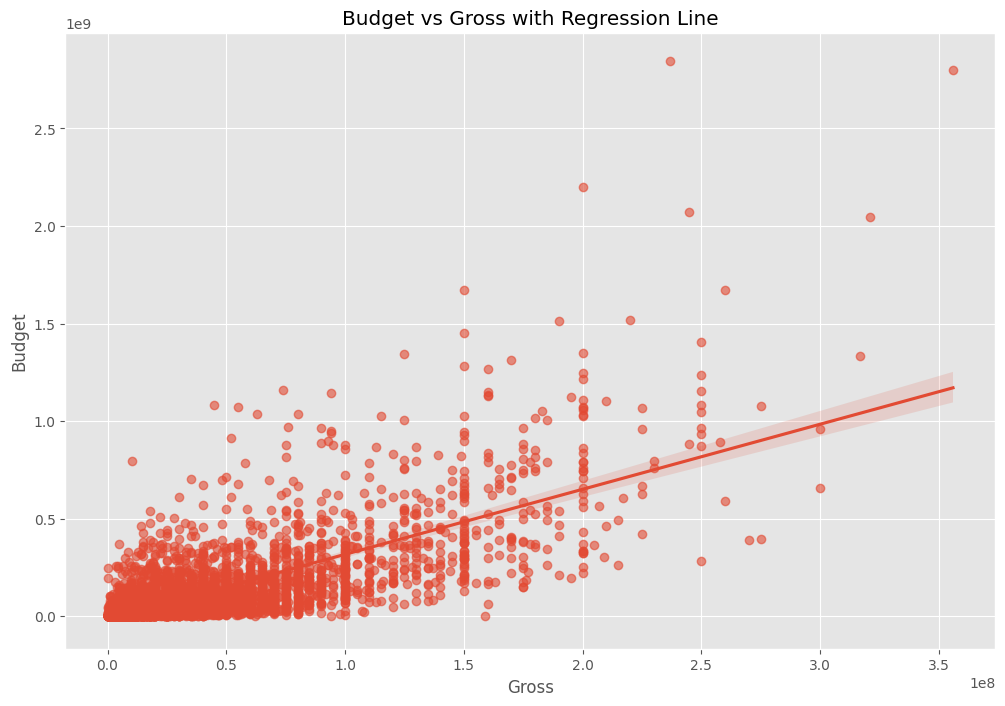

In [48]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"alpha":0.6})
plt.title('Budget vs Gross with Regression Line')
plt.xlabel('Gross')
plt.ylabel('Budget')
plt.show()


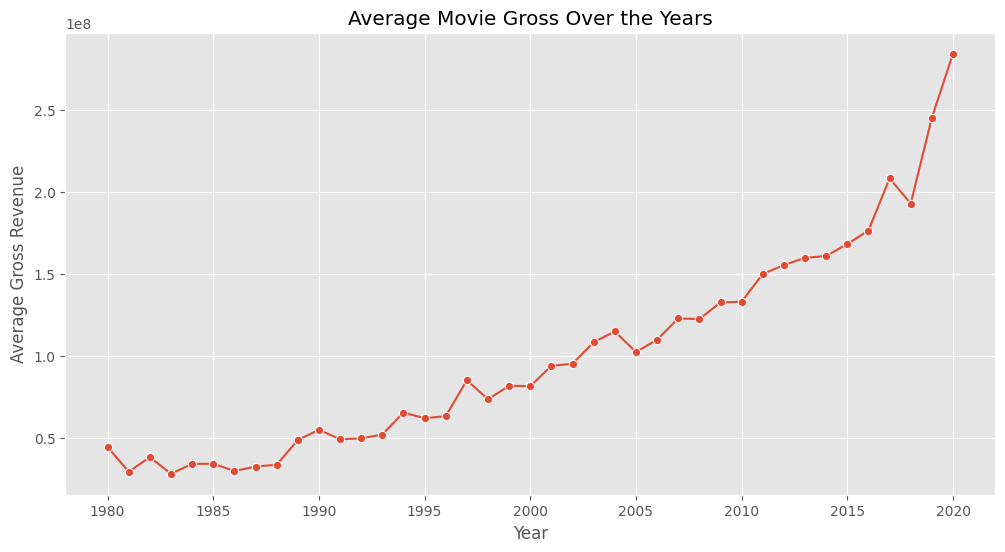

In [50]:
yearly_gross = df.groupby('year')['gross'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_gross, x='year', y='gross', marker='o')
plt.title('Average Movie Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Gross Revenue')
plt.grid(True)
plt.show()

In [51]:
top_writers = df.groupby('writer')['gross'].mean().sort_values(ascending=False).head(10)
print("Top 10 writers by average gross:")
print(top_writers)

top_directors = df.groupby('director')['gross'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 directors by average gross:")
print(top_directors)

Top 10 writers by average gross:
writer
Christopher Markus    1.083883e+09
Irene Mecchi          1.083721e+09
Rick Jaffa            1.076159e+09
Byron Howard          1.024121e+09
J.R.R. Tolkien        9.970720e+08
Jennifer Lee          9.547370e+08
Michael Goldenberg    9.421724e+08
Ted Elliott           9.317885e+08
Michael Berg          8.819658e+08
Jeff Pinkner          8.560852e+08
Name: gross, dtype: float64

Top 10 directors by average gross:
director
Anthony Russo    1.368850e+09
Kyle Balda       1.097122e+09
Josh Cooley      1.073395e+09
Chris Buck       1.059909e+09
Joss Whedon      9.873567e+08
Lee Unkrich      9.373943e+08
James Cameron    8.925841e+08
George Lucas     8.497511e+08
David Yates      8.407581e+08
J.J. Abrams      7.765626e+08
Name: gross, dtype: float64


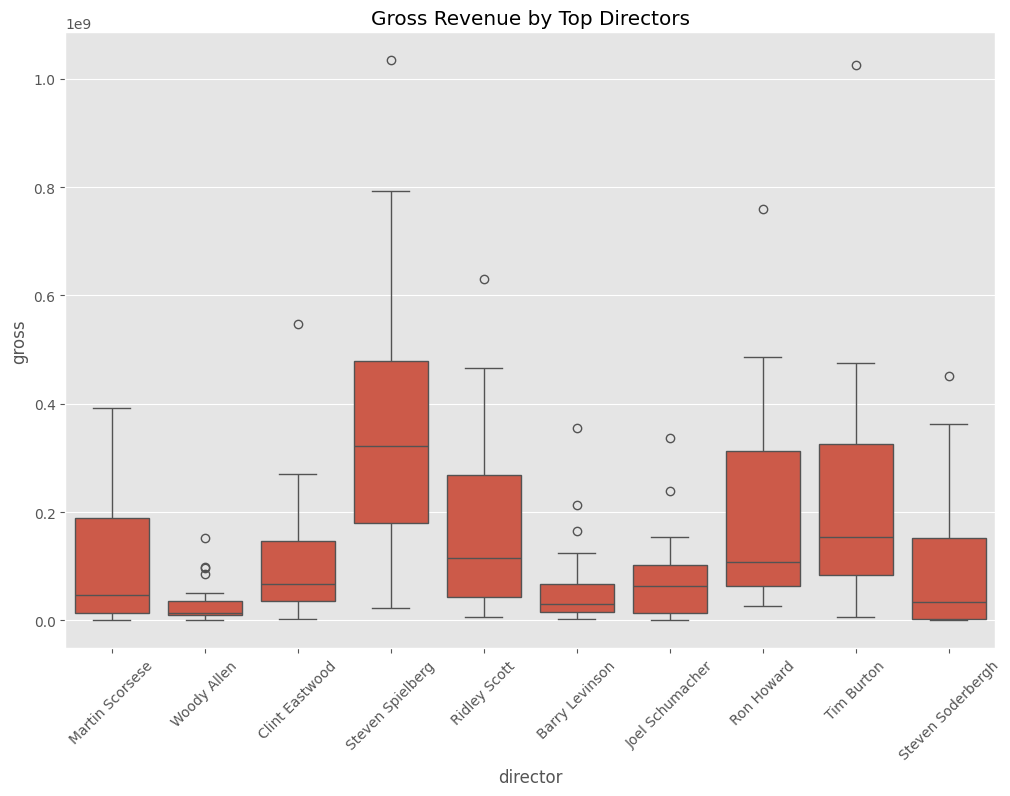

In [52]:
top_directors = df['director'].value_counts().head(10).index
sns.boxplot(x='director', y='gross', data=df[df['director'].isin(top_directors)])
plt.xticks(rotation=45)
plt.title('Gross Revenue by Top Directors')
plt.show()

In [55]:
X_year = sm.add_constant(df[['year']])
model_year_only = sm.OLS(df['gross'], X_year).fit()
print(model_year_only.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     441.0
Date:                Fri, 13 Jun 2025   Prob (F-statistic):           3.44e-94
Time:                        11:25:30   Log-Likelihood:            -1.1074e+05
No. Observations:                5421   AIC:                         2.215e+05
Df Residuals:                    5419   BIC:                         2.215e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.654e+09   4.65e+08    -20.777      0.0

In [54]:
df['director_encoded'] = df.groupby('director')['gross'].transform('mean')

import statsmodels.api as sm

features = ['budget', 'director_encoded', 'year']
X = df[features].dropna()
y = df.loc[X.index, 'gross']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     3572.
Date:                Fri, 13 Jun 2025   Prob (F-statistic):               0.00
Time:                        11:22:46   Log-Likelihood:            -1.0799e+05
No. Observations:                5421   AIC:                         2.160e+05
Df Residuals:                    5417   BIC:                         2.160e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.834e+07   2.98e+08  